# Lab 1: Códigos de Bloco

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

# 1. Simulação

In [24]:
from channel import BSC
from encoder import HammingEncoder, NaiveEncoder, AlternativeEncoder
from lab1 import Simulator

import random
random.seed(2023)

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]
k = 4
l = 1000000//k

## 1.1. Naive Encoder

In [25]:
naive_encoder = NaiveEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(naive_encoder, channel, k=k, l=l), channels)
naive_sim = list(map(Simulator.simulate, sim))

print(list(zip(p, naive_sim)))

[(0.5, 0.500831), (0.2, 0.199307), (0.1, 0.100258), (0.05, 0.050281), (0.02, 0.020018), (0.01, 0.009992), (0.005, 0.004897), (0.002, 0.001971), (0.001, 0.001009), (0.0005, 0.000483), (0.0002, 0.000207), (0.0001, 0.000105), (5e-05, 4.1e-05), (2e-05, 2e-05), (1e-05, 1.2e-05)]


## 1.2. Hamming Encoder

In [26]:
hamming_encoder = HammingEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(hamming_encoder, channel, k=k, l=l), channels)
hamming_sim = list(map(Simulator.simulate, sim))

print(list(zip(p, hamming_sim)))

[(0.5, 0.49955), (0.2, 0.195641), (0.1, 0.067006), (0.05, 0.019427), (0.02, 0.003378), (0.01, 0.000838), (0.005, 0.000191), (0.002, 3.5e-05), (0.001, 9e-06), (0.0005, 3e-06), (0.0002, 0.0), (0.0001, 0.0), (5e-05, 0.0), (2e-05, 0.0), (1e-05, 0.0)]


## 1.2. Altenative Encoder

In [27]:
k = 11
alt_encoder = AlternativeEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(alt_encoder, channel, k=k, l=l), channels)
alt_sim = list(map(Simulator.simulate, sim))

print(list(zip(p, alt_sim)))

[(0.5, 0.4999698181818182), (0.2, 0.22800036363636364), (0.1, 0.10386981818181819), (0.05, 0.036944363636363636), (0.02, 0.007270545454545455), (0.01, 0.0019694545454545455), (0.005, 0.0005385454545454545), (0.002, 6.945454545454545e-05), (0.001, 2.909090909090909e-05), (0.0005, 7.272727272727272e-06), (0.0002, 0.0), (0.0001, 0.0), (5e-05, 0.0), (2e-05, 0.0), (1e-05, 0.0)]


## 2. Comparação

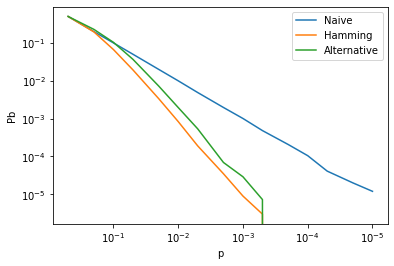

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()
plt.plot(p, naive_sim, p, hamming_sim, p, alt_sim)
ax.set_yscale('log')
ax.set_xscale('log')
ax.invert_xaxis()
ax.legend(['Naive', 'Hamming', 'Alternative'])
plt.xlabel('p')
plt.ylabel('Pb')
plt.minorticks_off()
plt.show()
# plt.savefig('grafico.png')

In [29]:
import numpy as np
G = np.array([[1,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
                [0,1,0,0,0,0,0,0,0,0,0,0,1,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,1,0,1,1],
                [0,0,0,1,0,0,0,0,0,0,0,1,1,0,1],
                [0,0,0,0,1,0,0,0,0,0,0,1,1,1,0],
                [0,0,0,0,0,1,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,1,0,0,0,0,1,1,0],
                [0,0,0,0,0,0,0,0,1,0,0,1,0,1,0],
                [0,0,0,0,0,0,0,0,0,1,0,1,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,1,1,0,0,1]])

In [30]:
for i in G[:,-4:].T:
    print(" & ".join([str(k) for k in i]) + " \\\\")

1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 1 & 1 & 1 \\
1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 \\
